In [57]:
from matplotlib import pyplot as plt
import numpy
import os

In [109]:
files = os.listdir(r"C:\Users\David\Documents\Serial Studio\CSV\Dwayne\2023\Jun\17")
files

['12-44-11.csv',
 '12-49-23.csv',
 '13-08-33.csv',
 '13-20-32.csv',
 '13-21-20.csv',
 '14-00-35.csv',
 '14-03-49.csv',
 '14-06-37.csv',
 '14-09-13.csv',
 '14-09-42.csv',
 '14-11-56.csv',
 '14-23-22.csv',
 '14-26-28.csv',
 '14-33-12.csv',
 '14-33-33.csv',
 '14-36-05.csv',
 '14-39-04.csv',
 '14-42-06.csv',
 '14-43-46.csv',
 '14-50-00.csv',
 '14-53-19.csv',
 '14-55-31.csv',
 '14-58-17.csv',
 '15-01-27.csv',
 '15-49-00.csv']

In [130]:
with open(r"""C:\\Users\\David\\Documents\\Serial Studio\\CSV\Dwayne\\2023\\Jun\17\\"""+files[-4],"r") as f:
    data = f.readlines()

In [131]:
def get_data(name,start_limit=0,end_limit=-1):
    selected = []
    selectValue = name
    for line in data[start_limit:end_limit]:
        fields = line.split(',')
        #print(fields)
        for field in fields:
            name = field.split(":")[0]
            value = field.split(":")[-1]
            if name.strip()==selectValue:
                selected.append(float(value))
    return selected

In [132]:
def calibrate_start():
    pitch = get_data("Pitch")
    last = 0

    pitch.reverse()
    for idx,val in enumerate(pitch):
        if val<65:
            last = len(pitch)-idx
            break
    return last

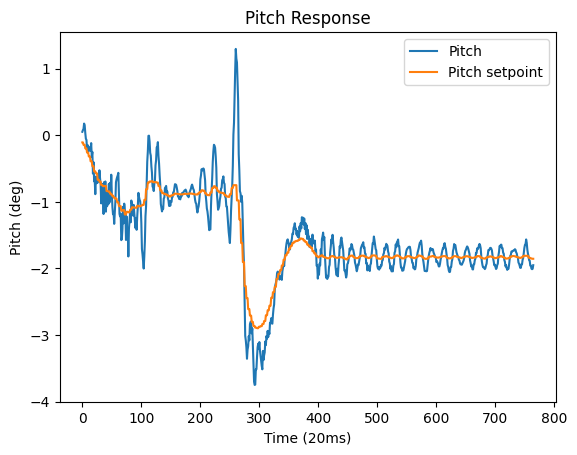

In [138]:
def plot_pitch():
    last = calibrate_start()
    measured_data = get_data("Pitch",0,last-1000)
    setpoint_data = get_data("PitchSetpoint",0,last-1000)
    plt.plot(measured_data,label="Pitch")
    plt.plot(setpoint_data,label="Pitch setpoint")
    plt.title("Pitch Response")
    plt.ylabel("Pitch (deg)")
    plt.xlabel("Time (20ms)")
    plt.legend()
plot_pitch()

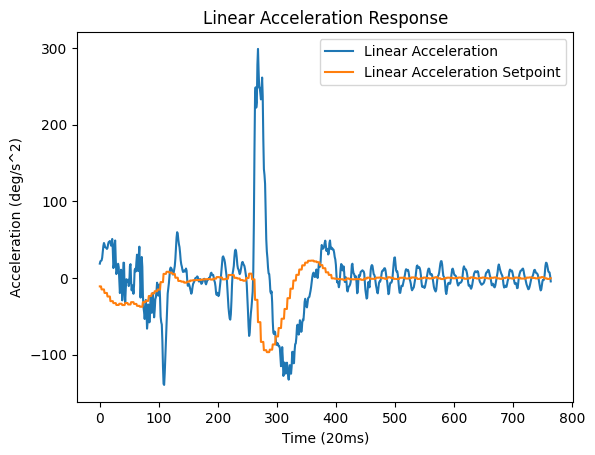

In [137]:
def plot_accel():
    last = calibrate_start()
    measured_data = get_data("LinearAccel",0,last-1000)
    setpoint_data = get_data("AccelSetpoint",0,last-1000)
    plt.plot(measured_data,label="Linear Acceleration")
    plt.plot(setpoint_data,label="Linear Acceleration Setpoint")
    plt.title("Linear Acceleration Response")
    plt.ylabel("Acceleration (deg/s^2)")
    plt.xlabel("Time (20ms)")
    plt.legend()
plot_accel()

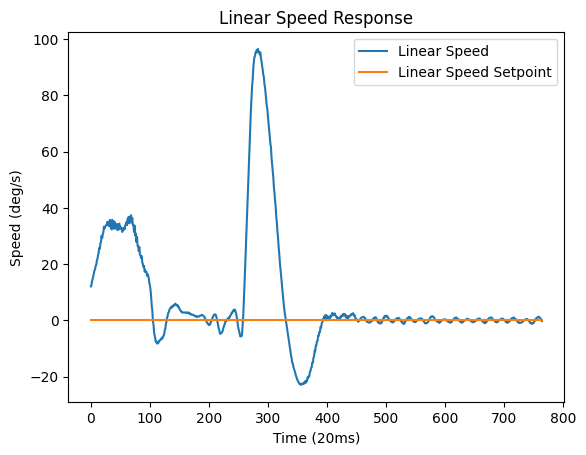

In [140]:
def plot_speed():
    last = calibrate_start()
    measured_data = get_data("LinearSpeed",0,last-1000)
    setpoint_data = get_data("speedSetpoint",0,last-1000)
    plt.plot(measured_data,label="Linear Speed")
    plt.plot(setpoint_data,label="Linear Speed Setpoint")
    plt.title("Linear Speed Response")
    plt.ylabel("Speed (deg/s)")
    plt.xlabel("Time (20ms)")
    plt.legend()
plot_speed()